In [108]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [109]:
data_set = pd.read_csv('./data/heart.csv')
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [111]:
data_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [112]:
data_set.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 
              'exercise_induced_angina', 'st_depression', 
              'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# loc 

In [113]:
x = data_set.loc[: , data_set.columns != 'target']
x

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


# iloc

In [114]:
x = data_set.iloc[:,:-1]
x

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [115]:
y = data_set['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2


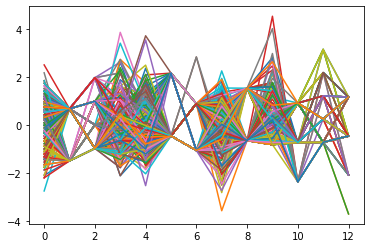

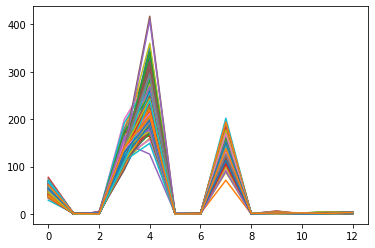

In [117]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_train_scaled
for i in x_train_scaled:
    plt.plot(i)
plt.show()
for i in x_train.values:
    plt.plot(i)
plt.show()

In [118]:
x_test_scaled = sc.transform(x_test)
x_test_scaled

array([[-1.44812239e+00, -1.50674161e+00, -4.05750470e-03,
        -1.50620766e+00, -9.94146341e-01, -4.64844492e-01,
         8.76499224e-01,  7.29681827e-01, -6.57231057e-01,
        -8.29886669e-01,  9.01679374e-01,  2.35839684e-01,
        -4.69766919e-01],
       [-1.01033898e+00,  6.63683803e-01, -9.85973641e-01,
        -1.56258852e+00, -7.79512195e-01, -4.64844492e-01,
        -1.06948988e+00, -1.59905085e-01,  1.52153491e+00,
         1.75927415e+00, -7.38970314e-01, -7.31502747e-01,
        -4.69766919e-01],
       [ 9.59686356e-01, -1.50674161e+00, -9.85973641e-01,
         1.03093100e+00,  3.49170732e+00, -4.64844492e-01,
        -1.06948988e+00,  1.06970988e-01, -6.57231057e-01,
         2.62232775e+00, -7.38970314e-01,  2.17052454e+00,
         1.15428443e+00],
       [-7.91447278e-01,  6.63683803e-01,  9.77858632e-01,
        -9.66861840e-02,  1.86341463e-01, -4.64844492e-01,
         8.76499224e-01,  1.21895463e+00, -6.57231057e-01,
        -8.29886669e-01,  9.01679374e

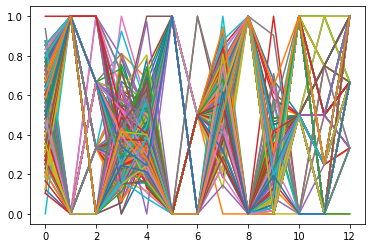

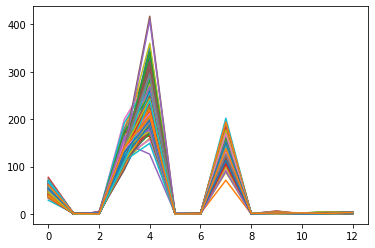

In [119]:
mnmx = MinMaxScaler(feature_range=(0,1))
x_train_scaled_mx = mnmx.fit_transform(x_train)
x_train_scaled_mx
for i in x_train_scaled_mx:
    plt.plot(i)
plt.show()
for i in x_train.values:
    plt.plot(i)
plt.show()

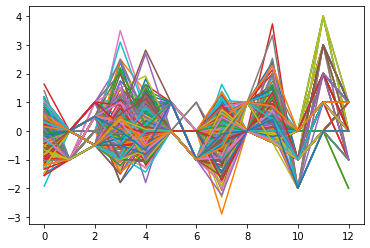

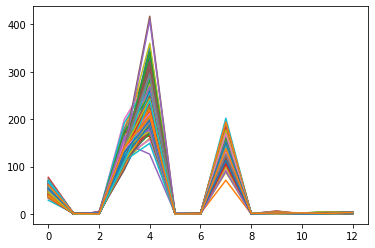

In [120]:
rbsc = RobustScaler()
x_train_scaled_rb = rbsc.fit_transform(x_train)
for i in x_train_scaled_rb:
    plt.plot(i)
plt.show()
for i in x_train.values:
    plt.plot(i)
plt.show()